# 1.. read data from SQL Database !

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sqlite3

In [5]:
#create a SQL connection to our SQLite database
con = sqlite3.connect(r"password_resources/password_Data.sqlite")

In [6]:
#### check online its table name on https://sqliteonline.com/
data = pd.read_sql_query("SELECT * FROM Users" , con)

In [7]:
data.shape

(100000, 3)

In [8]:
data.head(4)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2


In [9]:
data[data['strength'] == 0][0: 3]

,index,password,strength
20,20,dtc5aoy,0
47,47,paxton0,0
49,49,joskes9,0


In [10]:
data[data['strength'] == 1][0: 3]

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1


In [11]:
data[data['strength'] == 2][0: 3]

,index,password,strength
3,3,accounts6000webhost.com,2
7,7,180ZIRUVIcuFERy,2
14,14,crnogorac381PG,2


# 2.. Doing basic data cleaning !

In [12]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

### Removing ir-relevant features !

In [13]:
data.drop(["index"] , axis=1 , inplace=True)

In [14]:
data.head(4)

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2


### Check duplicate rows

In [15]:
data.duplicated().sum()

0

### check missing values in columns 

In [16]:
data.isnull().any()

password    False
strength    False
dtype: bool

In [17]:
data.isnull().any().sum()

0

### check data-types

In [18]:
data.dtypes

password    object
strength     int64
dtype: object

### checking whether "strength" feature has ir-relevant values or not 

In [19]:
data["strength"]

0        1
1        1
2        1
3        2
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: strength, Length: 100000, dtype: int64

In [20]:
data["strength"].unique()

array([1, 2, 0], dtype=int64)

# 3.. Performing Semantic Analysis 
    e.g ,,      
          
          a) How many password textual actually holds only numeric characters ?
          b) How many password textual actually holds only Upper-case character ? 
          
          c) How many password textual actually holds only alphabet ?
          d) How many password textual actually holds alpha-numeric character ? 
          e) How many password textual actually holds title-case character ? 
          
          f) How many password textual actually holds some special special character ? 
          
          

In [21]:
data.columns

Index(['password', 'strength'], dtype='object')

In [22]:
data["password"]

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [23]:
data["password"][0]

'zxe870819'

In [24]:
type(data["password"][0])

str

### a) How many password textual actually holds only numeric characters ?

In [25]:
data["password"].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [26]:
data[data["password"].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [27]:
data[data["password"].str.isnumeric()].shape  ### only 26 people have set their password as only number 

(26, 2)

### b) How many password textual actually holds only Upper-case character ? 

In [28]:
data[data["password"].str.isupper()]

### around 1500 users have their password as only capital letters 

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


### c) How many password textual actually holds only alphabet ? 

In [29]:
data[data["password"].str.isalpha()].shape

### around 50 users have their password as alphabet letters only 

(50, 2)

### d) How many password textual actually holds alpha-numeric character ? 

In [30]:
data[data["password"].str.isalnum()]

### most of the users around 97K have their password as alpha-numeric..

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


### e) How many password textual actually holds title-case character ? 

In [31]:
data[data["password"].str.istitle()]

### around 932 users have their password having first alphabet capital 

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


### f) How many password textual actually holds special character ? 

In [32]:
data["password"]

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [33]:
import string

In [34]:
string.punctuation ## all punctuations defined in "string" package 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
def find_semantics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [36]:
data["password"].apply(find_semantics)==1

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [37]:
data[data["password"].apply(find_semantics)==1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


ie , 2663 observations have special characters in between them ..

2.6% people password actually uses special character in their password ..

## 4.. Applying Feature Engineering !

5 factors :

- Length of password
- Frequency of Lowercase Characters
- Frequency of Uppercase Characters
- Frequency of Numeric Characters
- Frequency of Special Characters


#### length of every Password 

In [39]:
data["password"][0]

'zxe870819'

In [40]:
len(data["password"][0]) 

9

In [41]:
data["length"] = data["password"].str.len() 

#### Frequency of Lowercase Characters :

In [42]:
password = "Shan99"

In [43]:
[char for char in password if char.islower()]

['h', 'a', 'n']

In [44]:
len([char for char in password if char.islower()])

3

In [45]:
len([char for char in password if char.islower()])/len(password)

0.5

Q..->> why we are diving each value by its Total length or why we are normalizing frequency ? 

Ans : Just  to get rid of some outliers bcz some passwords have huge length as we have seen , hence value of lowercase could 
also be high , so lets normalise it in the range between 0 to 1

In [47]:
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

#### Frequency of Uppercase Characters :

In [48]:
def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

#### Frequency of Numeric Characters :

In [49]:
def freq_numerical_case(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [51]:
data["lowercase_freq"] = np.round(data["password"].apply(freq_lowercase) , 3)

data["uppercase_freq"] = np.round(data["password"].apply(freq_uppercase) , 3)

data["digit_freq"] = np.round(data["password"].apply(freq_numerical_case) , 3)

In [52]:
data.head(3)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222


#### Frequency of Special-case Characters :

In [53]:
def freq_special_case(row):
    special_chars = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)

In [54]:
data["special_char_freq"] = np.round(data["password"].apply(freq_special_case) , 3) ## applying "freq_special_case" function

In [55]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0
1,xw46454nr23l,1,12,0.417,0.0,0.583,0
2,soporte13,1,9,0.778,0.0,0.222,0
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,1
4,c443balg,1,8,0.625,0.0,0.375,0


In [56]:
data["special_char_freq"] = data["special_char_freq"]/data["length"] ## noromalising "special_char_freq" feature 

In [57]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000


## 5.. Performing Descriptive Statistics !

In [58]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [59]:
data[['length' , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [60]:
cols = ['length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq']

for col in cols:
    print(col)
    print(data[[col , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"]))
    print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


digit_freq
         digit_freq                        
                min    max      mean median
strength                                   
0   

->> Higher the length, Higher the strength

->> In case on alphabet frequency higher is not better. 
    Probably because it'll not be a strong password if max portion is occupied by just alphabets..
    Password has more strength if the char types are spread in decent proportions.

In [63]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

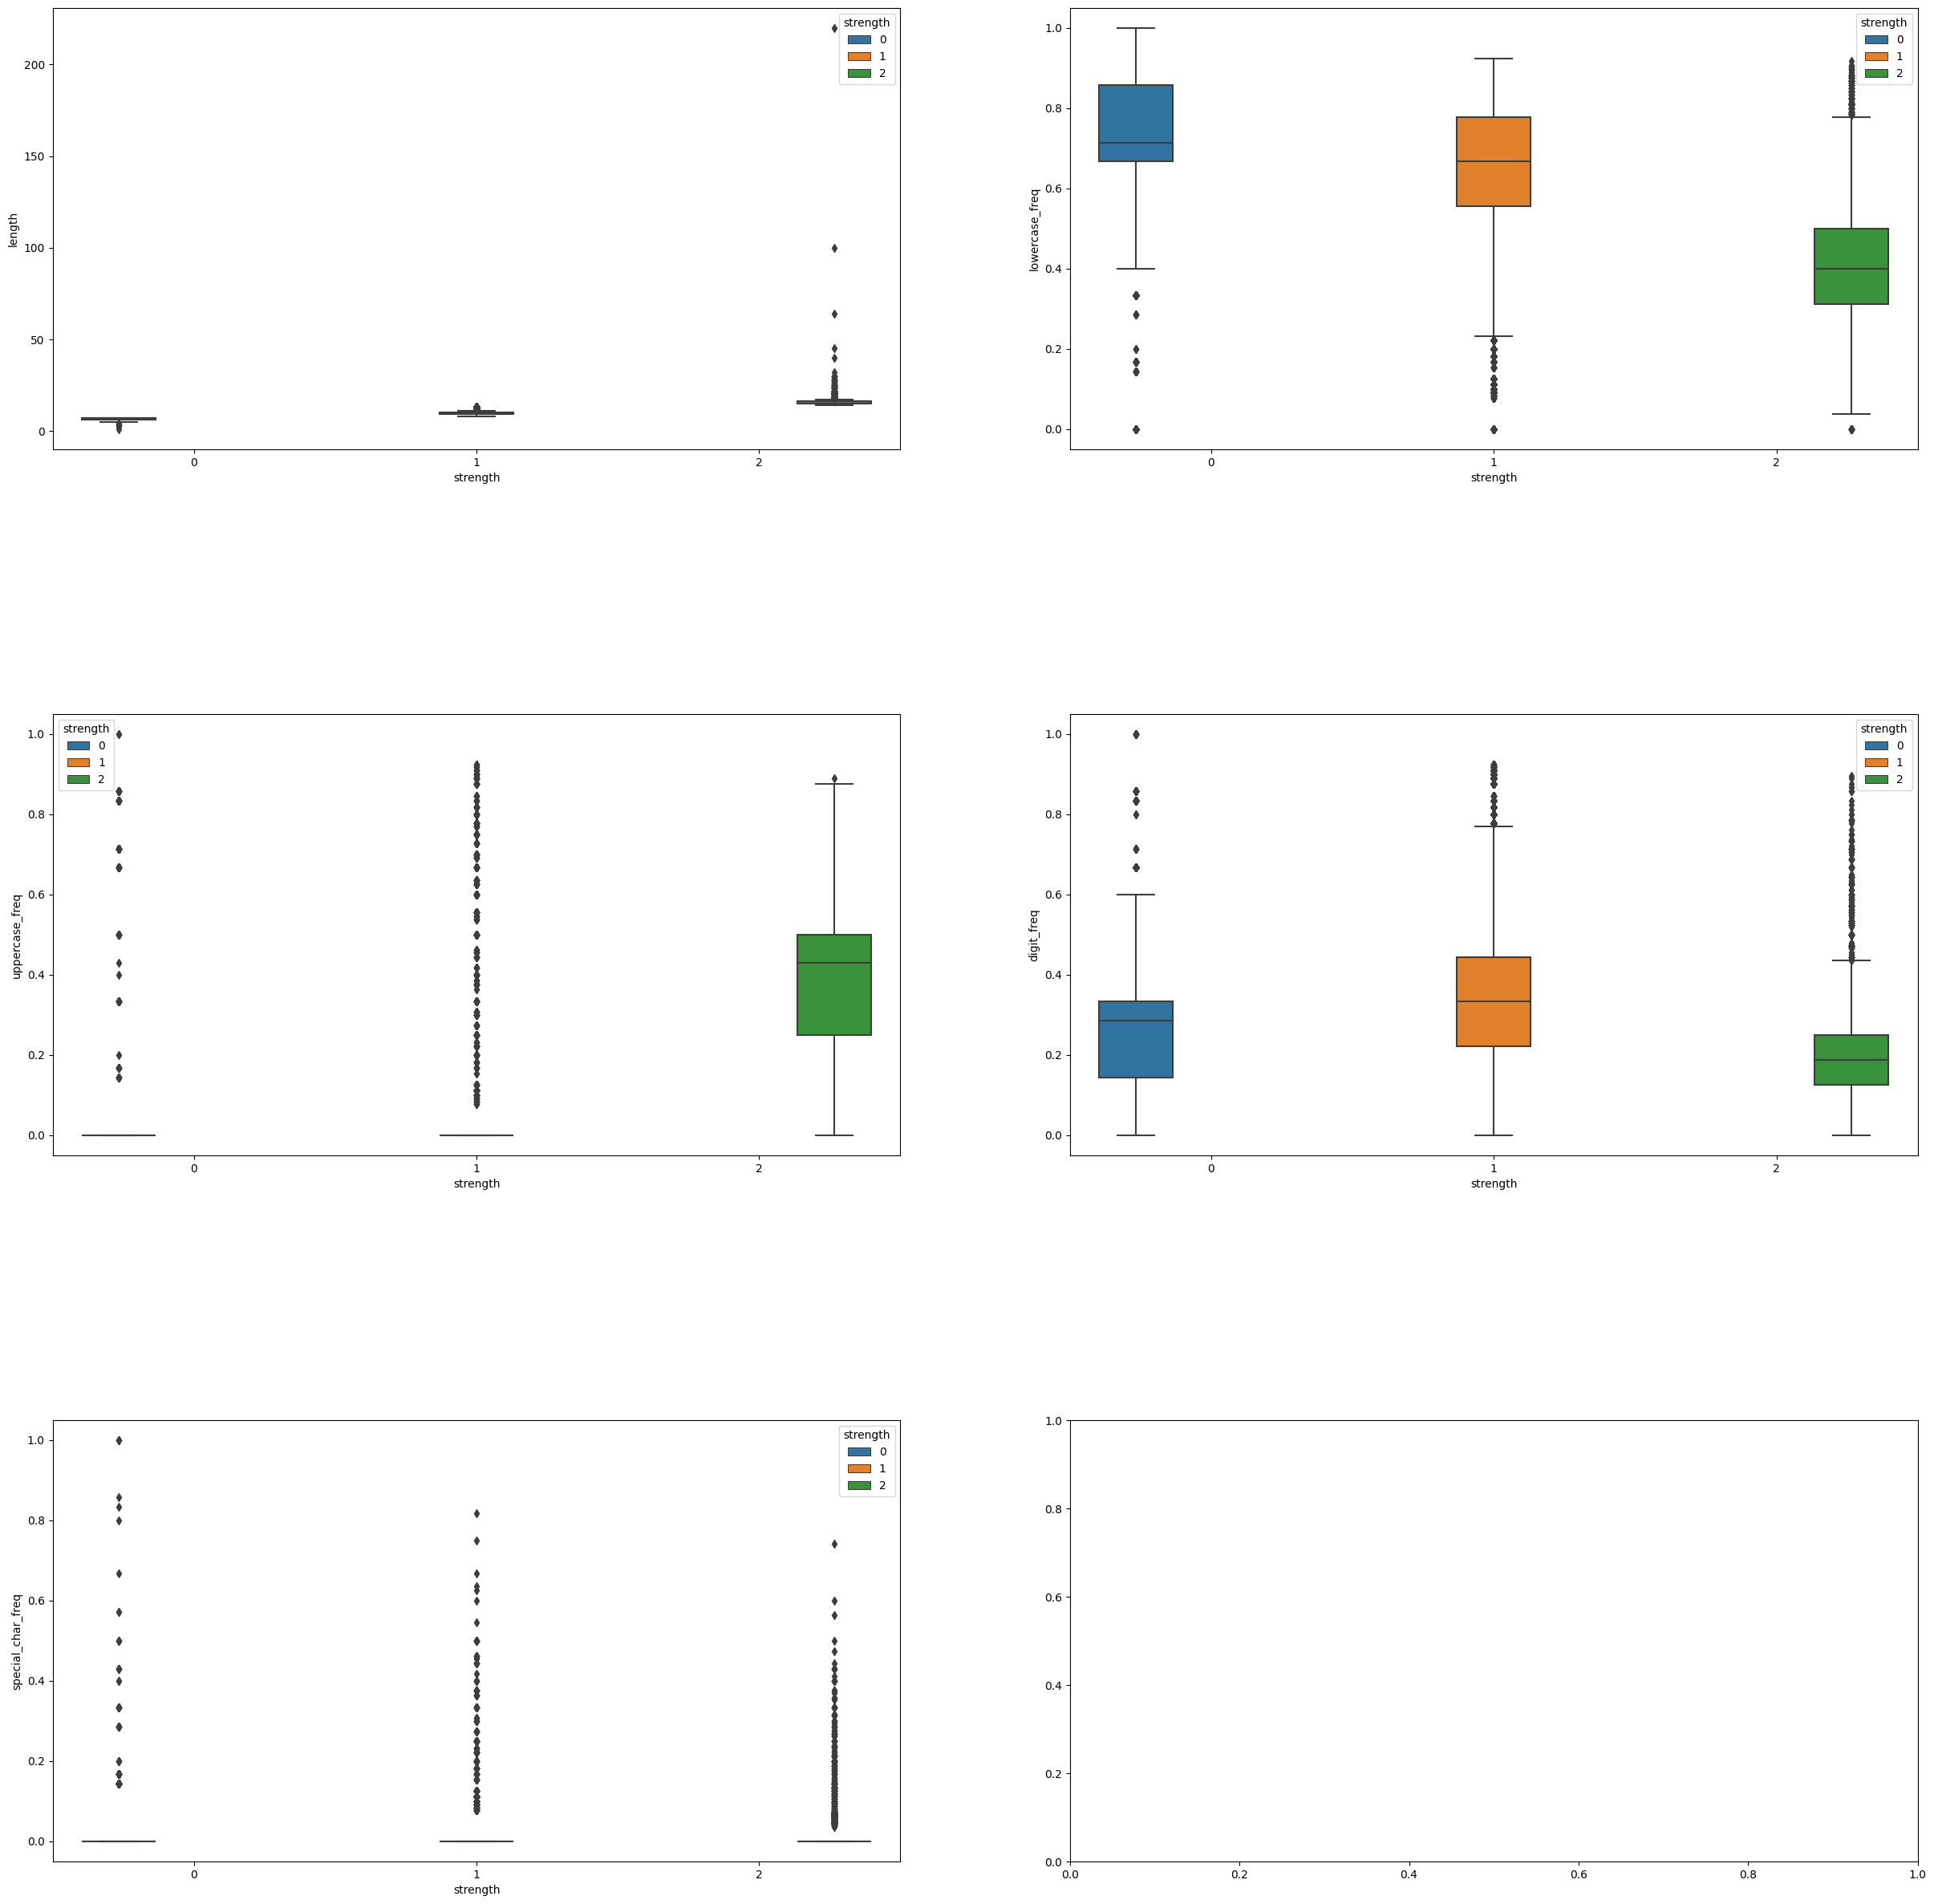

In [139]:
fig , ((ax1 , ax2) , (ax3 , ax4) , (ax5,ax6)) = plt.subplots(3 , 2 , figsize=(30,30))

sns.boxplot(x="strength" , y='length' , hue="strength" , ax=ax1 , data=data)
sns.boxplot(x="strength" , y='lowercase_freq' , hue="strength" , ax=ax2, data=data)
sns.boxplot(x="strength" , y='uppercase_freq' , hue="strength" , ax=ax3, data=data)
sns.boxplot(x="strength" , y='digit_freq' , hue="strength" , ax=ax4, data=data)
sns.boxplot(x="strength" , y='special_char_freq' , hue="strength" , ax=ax5, data=data)

plt.subplots_adjust(hspace=0.6)

Insights :
Regarding the insights we can say that:-


- Higher Lowercase frequency is seen in low strength passwords. 
    For higher strength passwords ,  Lowercase frequency can be high too but that is probably effect of length.


- In digit_freq there is a split of majority poplutation of strength 1 and 2 
    but for 0 and 1 strength , there is overlap so no too much to say there. 
    But we can say a nicely propotioned password is good..
    
    
- In upper_freq , there is a trend but not as strong as length or lower_freq..
    
    
- Similar but stronger same trend as above in special_freq.

- Higher strength passwords have more type breaks.

## 6.. Feature Importance ! ( How to figure out imp. feature )

In [66]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [67]:
def get_dist(data , feature):
    
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    
    sns.violinplot(x='strength' , y=feature , data=data )
    
    plt.subplot(1,2,2)
    
    sns.distplot(data[data['strength']==0][feature] , color="red" , label="0" , hist=False)
    sns.distplot(data[data['strength']==1][feature], color="blue", label="1", hist=False)
    sns.distplot(data[data['strength']==2][feature], color="orange", label="2", hist=False)
    plt.legend()
    plt.show()

In [68]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

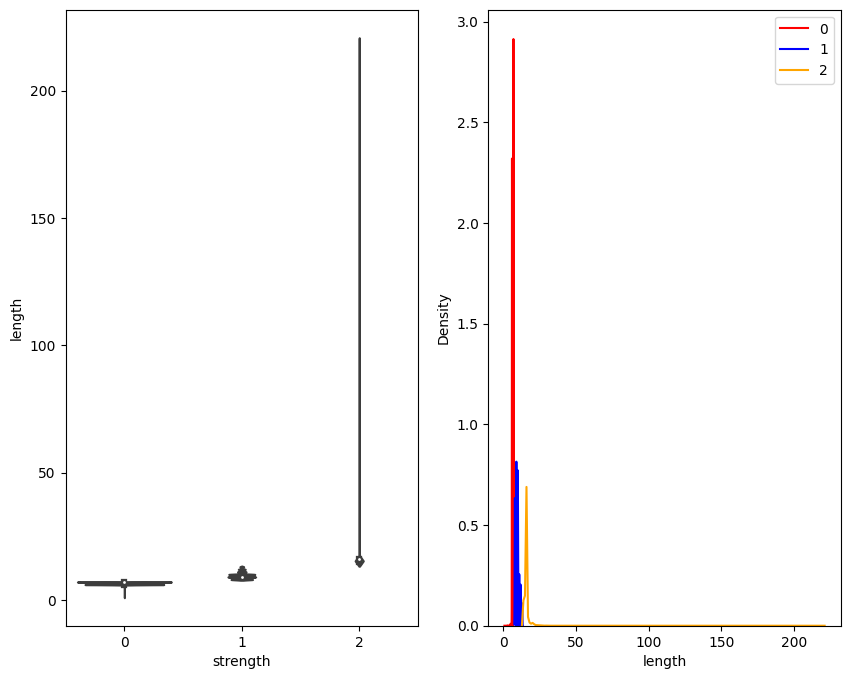

In [69]:
get_dist(data , "length")

In [70]:
### we have few overlappping region in distribution plot 
### when class is 2 , we have higher value of 'length' than class 1 & class 0

## it means 'length' is a interesting feature as we have very less overlapping region

## similarly from violinplot ,we will say on account of less overlappping , 
## this feature 'length' is amazing & useful in determining the strength


In [71]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

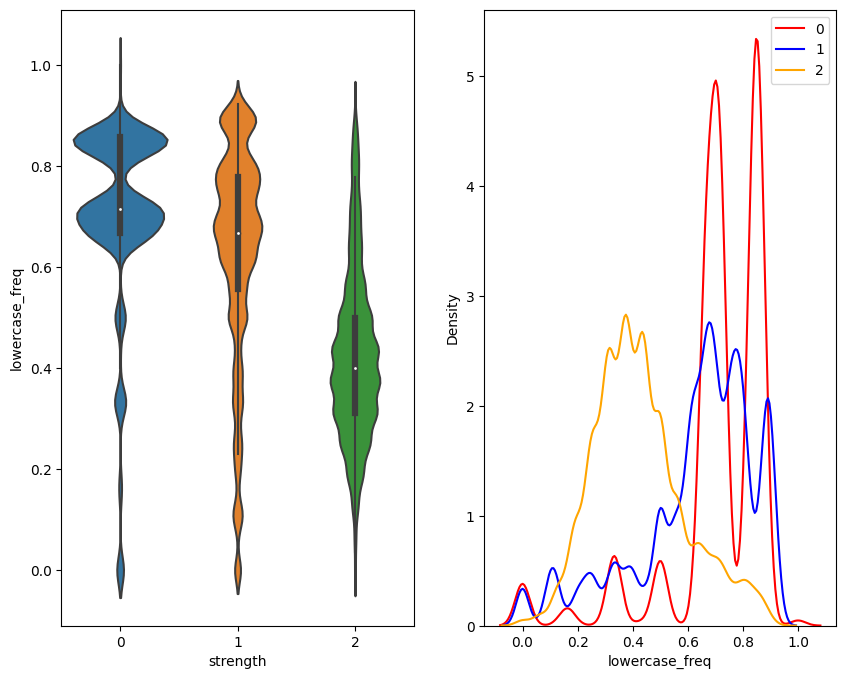

In [72]:
get_dist(data , 'lowercase_freq')

In [73]:
### we have some kind of overlappping region in distribution plot 
### when class is 2 , we have less value of 'lower_freq' than class 1 & class 0

## it means 'lower_freq' is a interesting feature upto some extent as have some overlapping region

## similarly from violinplot ,we will say on account of such overlappping , 
## when class is 2 we have less value of 'lower_freq' than class 1 & class 0
## this feature 'lower_freq' is a interesting feature upto some extent in determining the strength

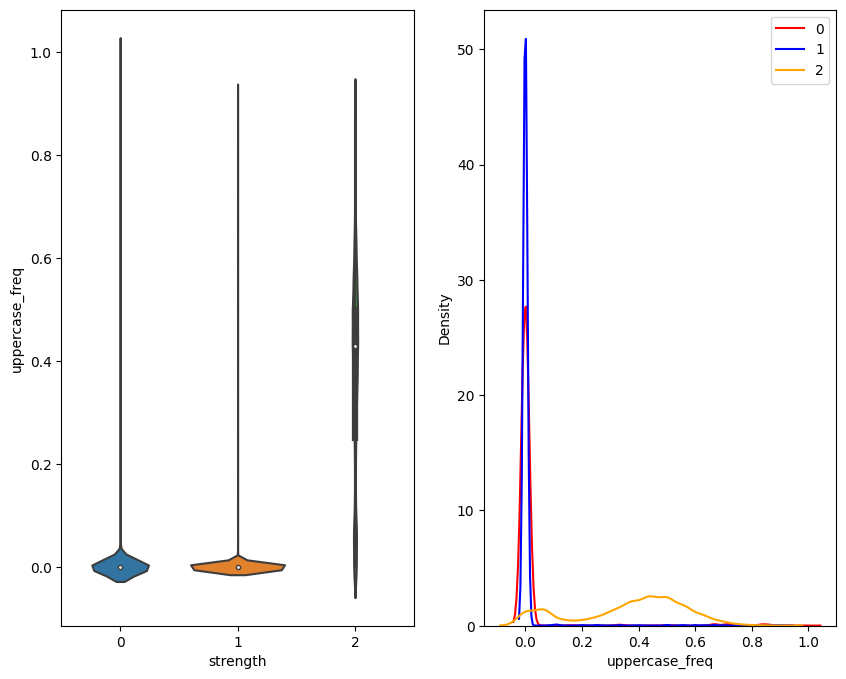

In [74]:
get_dist(data , 'uppercase_freq')

In [75]:
### we have quite high overlappping region in distribution plot 

## it means 'upper_freq' is not that much interesting feature as have some overlapping region

## similarly from violinplot ,we will say on account of such huge overlappping , 
## this feature 'lower_freq' is not a interesting feature in determining the strength

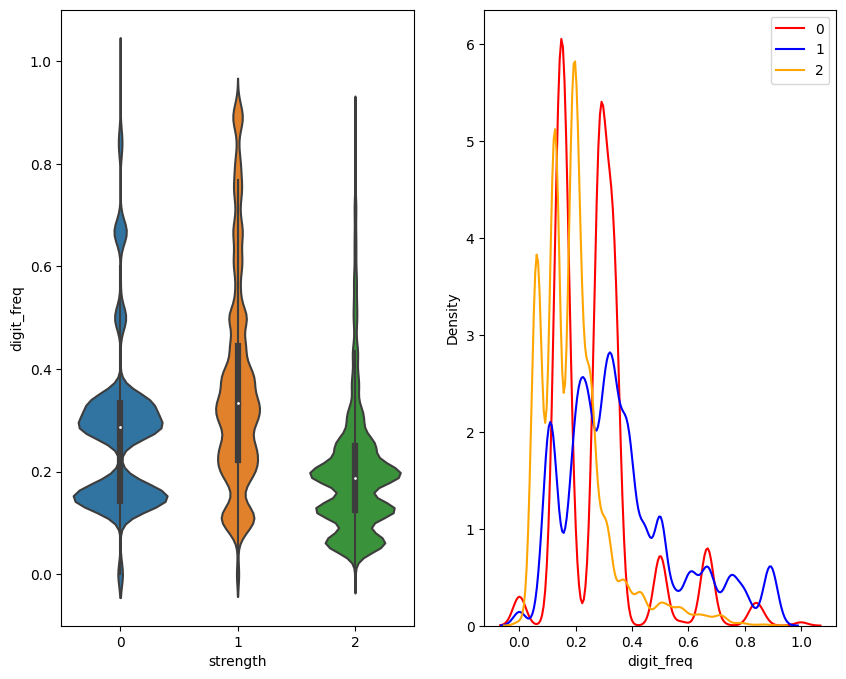

In [76]:
get_dist(data , 'digit_freq')

In [77]:
### we have quite high overlappping region in distribution plot 

## it means 'upper_freq' is not that much interesting feature as have some overlapping region

## similarly from violinplot ,we will say on account of such huge overlappping , 
## this feature 'lower_freq' is not a interesting feature in determining the strength

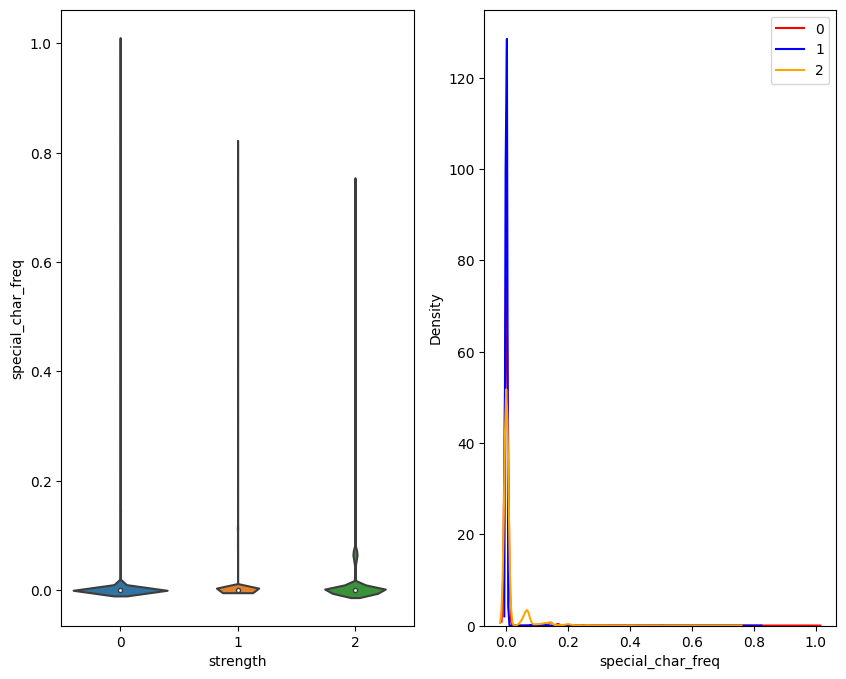

In [78]:
get_dist(data , 'special_char_freq')

Key Insight : It ives us idea that length & lowercase freq are important features..

## 7.. Applying TF_IDF on data

In [80]:
data.head(4)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478


In [81]:
data

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000
...,...,...,...,...,...,...,...
99995,obejofi215,1,10,0.700,0.0,0.300,0.000000
99996,fmiopvxb64,1,10,0.800,0.0,0.200,0.000000
99997,czvrbun38,1,9,0.778,0.0,0.222,0.000000
99998,mymyxe430,1,9,0.667,0.0,0.333,0.000000


In [82]:
dataframe = data.sample(frac=1) ### shuffling randomly for robustness of ML moodel 

In [83]:
dataframe

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
30110,yqrlncvb5,1,9,0.889,0.000,0.111,0.0
59196,ohuca787,1,8,0.625,0.000,0.375,0.0
68159,dima100388,1,10,0.400,0.000,0.600,0.0
69598,narayan07,1,9,0.778,0.000,0.222,0.0
24452,shs0106722353,1,13,0.231,0.000,0.769,0.0
...,...,...,...,...,...,...,...
76515,j7j7j7,0,6,0.500,0.000,0.500,0.0
58888,patton1,0,7,0.857,0.000,0.143,0.0
68549,fefa4c86,1,8,0.625,0.000,0.375,0.0
15861,PXV5d7TQ3MAd4LwZ,2,16,0.188,0.562,0.250,0.0


In [84]:
x = list(dataframe["password"])

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer ## import TF-IDF vectorizer to convert text data into numerical data

In [86]:
#### as password is a series of chars , we have to calculate TF_IDF values of each char 
#### Thats why we have to split our password as-->>
#### kzde5577-->> ['k', 'z', 'd', 'e', '5', '5', '7', '7']


### then we can compute Tf-Idf value of each character like Tf-IDF value of k , Tf-IDF value of z


In [87]:
vectorizer = TfidfVectorizer(analyzer="char")

In [88]:
X = vectorizer.fit_transform(x)

In [89]:
X.shape


## ie (100000,1) passwords gets represented using (100000, 99)
## ie each password gets represented using 99 dimensions ..

(100000, 99)

In [90]:
dataframe["password"].shape

(100000,)

In [91]:
X

<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [92]:
X.toarray()  ### to get entire matrix of TF-IDF for 100000 passwords 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [93]:
X.toarray()[0] ## TF-IDF scores of Ist row

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.31869356, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.35519234, 0.33187234,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.30553716, 0.        ,
       0.27238041, 0.        , 0.        , 0.40132963, 0.28223919,
       0.        , 0.        , 0.        , 0.38297632, 0.        ,
       0.        , 0.32740529, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [94]:
dataframe["password"]

30110           yqrlncvb5
59196            ohuca787
68159          dima100388
69598           narayan07
24452       shs0106722353
               ...       
76515              j7j7j7
58888             patton1
68549            fefa4c86
15861    PXV5d7TQ3MAd4LwZ
62840              8piano
Name: password, Length: 100000, dtype: object

In [95]:
len(vectorizer.get_feature_names_out())

99

In [96]:
### returns feature/char_of_passwords/columns names

vectorizer.get_feature_names_out()

## ie these are the various chars to which different TF-IDF values are assigned for 100000 passwords 

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [97]:
df2 = pd.DataFrame(X.toarray() , columns=vectorizer.get_feature_names_out())

In [98]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 8.. Applying Machine Learning algorithm !

In [99]:
dataframe.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [100]:
df2["length"] = dataframe['length']
df2["lowercase_freq"] = dataframe['lowercase_freq']

In [101]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [102]:
y = dataframe["strength"]

#### split data into train & test
    train---> To learn the relationship within data, 
    test-->  To do predictions, and this testing data will be unseen to my model

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20)

In [105]:
X_train.shape

(80000, 101)

In [106]:
y_train.shape

(80000,)

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
## Apply Multinomial logistic Regression as have data have 3 categories in outcomes

clf = LogisticRegression(multi_class="multinomial")

In [109]:
clf.fit(X_train , y_train)

LogisticRegression(multi_class='multinomial')

In [110]:
y_pred = clf.predict(X_test) ## doing prediction on X-Test data

In [111]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [112]:
from collections import Counter

In [113]:
Counter(y_pred)

Counter({1: 16819, 2: 1915, 0: 1266})

## 9.. Doing prediction on sample data (user-entered input)

In [114]:
### as Logistic reg. model'clf' was trained on 101 features [99 from TF-IDF + 2 features from (total_length+lower_case_freq)]
## hence we need to convert any input(password) into (1,101) so that my model will accept this as Input ..

In [115]:
password = "%@123abcd"

In [116]:
sample_array = np.array([password])

In [117]:
sample_matrix = vectorizer.transform(sample_array)

In [118]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [119]:
sample_matrix.toarray().shape

### right now , array dim. is (1,99) so now we need to make it as : (1,101) so that my model will accept it as input..
### ie we need to add (length_of_password) & (total_lowercase_chars) in passsword

(1, 99)

In [120]:
password

'%@123abcd'

In [121]:
len(password)

9

In [122]:
[char for char in password if char.islower()]

['a', 'b', 'c', 'd']

In [123]:
len([char for char in password if char.islower()])/len(password)

0.4444444444444444

In [124]:
np.append(sample_matrix.toarray() , (9,0.444)).shape

(101,)

In [125]:
np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [126]:
np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101).shape

(1, 101)

In [127]:
new_matrix = np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101)

In [128]:
clf.predict(new_matrix)

array([0], dtype=int64)

In [130]:
def predict():
    password = input("Enter a password : ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)
    
    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)
    
    new_matrix2 = np.append(sample_matrix.toarray() , (length_pass , length_normalised_lowercase)).reshape(1,101)
    result = clf.predict(new_matrix2)
    
    if result == 0 :
        return "Password is weak"
    elif result == 1 :
        return "Password is normal"
    else:
        return "password is strong"

In [131]:
predict()

'Password is normal'

## 10.. Model evaluation :

In [133]:
from sklearn.metrics import confusion_matrix ,  accuracy_score , classification_report

In [134]:
accuracy_score(y_test , y_pred)

0.79765

In [135]:
confusion_matrix(y_test , y_pred)

array([[  670,  2053,    11],
       [  518, 13789,   410],
       [   78,   977,  1494]], dtype=int64)

In [137]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.53      0.25      0.34      2734
           1       0.82      0.94      0.87     14717
           2       0.78      0.59      0.67      2549

    accuracy                           0.80     20000
   macro avg       0.71      0.59      0.63     20000
weighted avg       0.78      0.80      0.77     20000

